In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df = pd.read_csv('USArrests.csv', index_col = 0)

In [5]:
df.head(3)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [6]:
df.shape

(50, 4)

In [7]:
# 1973 yili, per 100.000 suclar. UrbanPop % olarak.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [9]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [13]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [15]:
hopkins(df, df.shape[0])  # dogrudan 50 de yazilabilir

0.4073468659131762

In [17]:
hopkins(scale(df), df.shape[0]) # scale etmek gelistirdi

0.3637179794560333

KMeans

In [18]:
k_means = KMeans(n_clusters = 2).fit(df)  # scale edilmemis haliyle devam

In [19]:
clusters = k_means.labels_

In [20]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

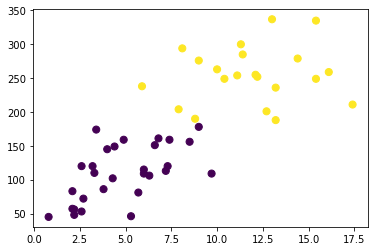

In [21]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [22]:
centroids = k_means.cluster_centers_

In [24]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

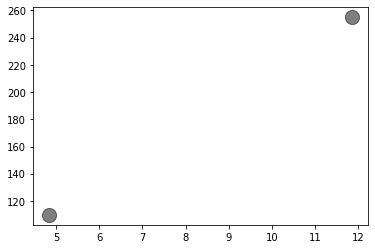

In [25]:
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

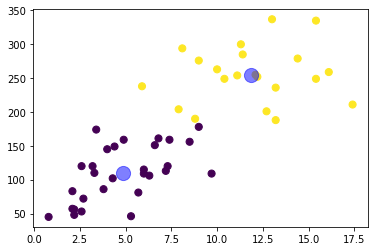

In [27]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", s = 200, alpha=0.5);

**Elbow Method**

In [28]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

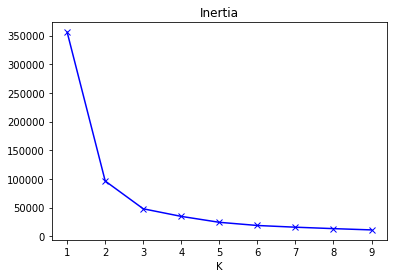

In [30]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

In [32]:
ssd

[355807.8215999999,
 96399.02814449917,
 47964.26535714286,
 34728.62935714286,
 24417.023523809527,
 18875.46422222222,
 15886.913269841269,
 13393.080476190476,
 11151.505119047619]

In [33]:
from yellowbrick.cluster import KElbowVisualizer

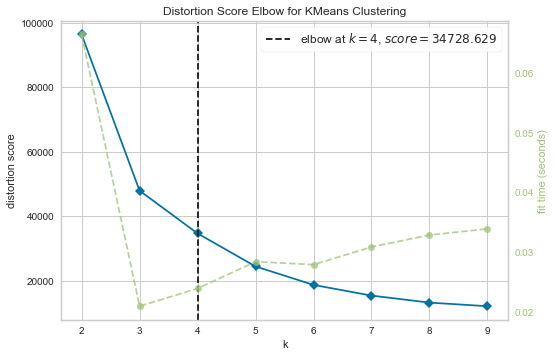

In [35]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof()

In [36]:
kmeans = KMeans(n_clusters = 4).fit(df)

In [37]:
labels = kmeans.labels_

In [38]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [39]:
df['cluster_id'] = labels

In [40]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


**Silhoutte Score**

In [41]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [42]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017569886048432


In [43]:
# silhoutte score 1'e yakinsa, kumeler birbirnden ayrilmis ve belirgin olur.
# also, cluster uyumunun da olcutudur - cluster ici elemanlar birbirine yakin, diger cluster elemanlarindan da uzaktirlar
# sil-score veriye atanir - veri noktalari birbirine ne kadar yakin ve diger cluster elemanlarina ne kadar uzak inceler

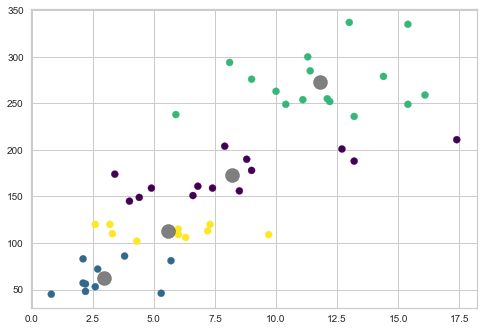

In [44]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [46]:
kmeans= KMeans(n_clusters=3).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

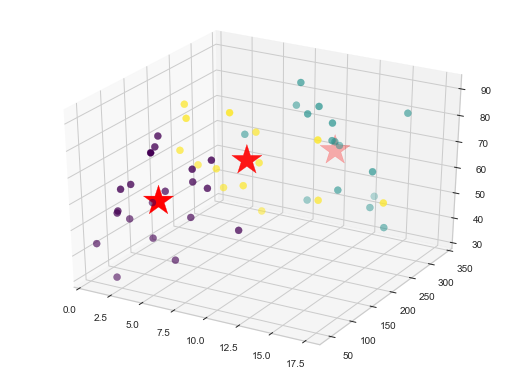

In [47]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

**ARI Score**

In [48]:
# external score - bunun icin domain bilgisi gerekiyor

In [49]:
new_df = df.sample(15)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
West Virginia,5.7,81,39,9.3,1
Nebraska,4.3,102,62,16.5,3
Iowa,2.2,56,57,11.3,1
Vermont,2.2,48,32,11.2,1
Alabama,13.2,236,58,21.2,2
Missouri,9.0,178,70,28.2,0
Montana,6.0,109,53,16.4,3
Virginia,8.5,156,63,20.7,0
Utah,3.2,120,80,22.9,3
Hawaii,5.3,46,83,20.2,1


In [50]:
new_df['true_label'] = [0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 2, 3, 1, 2]

In [51]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
West Virginia,5.7,81,39,9.3,1,0
Nebraska,4.3,102,62,16.5,3,1
Iowa,2.2,56,57,11.3,1,0
Vermont,2.2,48,32,11.2,1,0
Alabama,13.2,236,58,21.2,2,2
Missouri,9.0,178,70,28.2,0,3
Montana,6.0,109,53,16.4,3,1
Virginia,8.5,156,63,20.7,0,0
Utah,3.2,120,80,22.9,3,1
Hawaii,5.3,46,83,20.2,1,0


In [52]:
from sklearn.metrics.cluster import adjusted_rand_score

In [53]:
adjusted_rand_score(new_df['true_label'], new_df['cluster_id'])

0.2607561929595828

In [54]:
#  ARI -1 ile 1 arasi degisir. 1'e yaklasmasi iyidir.

In [55]:
# daha az hatali bir sutun yazalim
new_df['true_label'] = [0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 1, 0, 2]

In [56]:
adjusted_rand_score(new_df['true_label'], new_df['cluster_id'])

0.4420289855072464

In [57]:
# Rand Score RI = (number of agreeing pairs) / (number of pairs)
# Adjusted RI = ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)